In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


In [2]:
plt.style.use("~/nice.mplstyle")

In [14]:
p512 = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/win4320/inference-validation/spectra.predictions.nested-lam.nc", decode_timedelta=False)
p1024 = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/nc1024-win4320/inference-validation/spectra.predictions.nested-lam.nc", decode_timedelta=False)
tds = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/win4320/inference-validation/spectra.truth.nested-lam.nc", decode_timedelta=False)

In [15]:
nice_names = {
    "sp": "Surface Pressure",
    "u10": "10m Zonal Wind",
    "v10": "10m Meridional Wind",
    "t2m": "2m Temperature",
    "sh2": "2m Specific Humidity",
    "gh": "Geopotential Height",
    "u": "Zonal Wind",
    "v": "Meridional Wind",
    "w": "Vertical Velocity",
    "t": "Temperature",
    "q": "Specific Humidity",
}

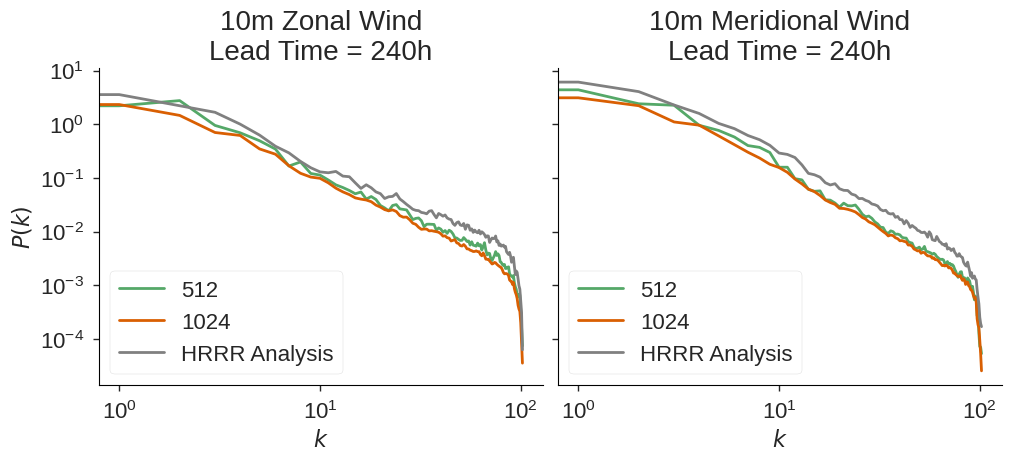

In [18]:
fhr = 240
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), constrained_layout=True, sharey=True)

for varname, ax in zip(tds.data_vars, axs):
    p512[varname].sel(fhr=fhr).plot(ax=ax, label="512")
    p1024[varname].sel(fhr=fhr).plot(ax=ax, label="1024")
    tds[varname].sel(fhr=fhr).plot(ax=ax, color="gray", label="HRRR Analysis")

    ax.set(
        yscale="log",
        xscale="log",
        title=f"{nice_names[varname]}\nLead Time = {fhr}h",
        xlabel="$k$",
        ylabel="$P(k)$" if ax.get_subplotspec().is_first_col() else "",
    )
    ax.legend(loc="lower left")
fig.savefig(f"figures/channels_spectra_{fhr:03d}h.jpeg", bbox_inches="tight", dpi=300)